# Introduction

This exercise is theopportunity to practice stacking on a dataset you have worked with before and that is the Titanic dataset.

Let's start by importing the librairies that we will use in the exercise.

In [1]:
# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

!pip install plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

# Going to use these 5 base models for the stacking
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

!pip install missingpy
from missingpy import KNNImputer

# Feature Exploration, Engineering and Cleaning 

1. Import the data using the following link : s3://full-stack-bigdata-datasets/Machine Learning Supervisé/stacking/titanic.csv , and display the first lines. Are there any missing values in the dataset?

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


2. What types of variables are present in this dataset? What kind of preprocessing could you run on these variables? Preprocess the dataset.

3. If you are lacking inspiration, here are some guidelines you can follow to clean the dataset as well as create new variables (feature engineering).

a.  Create a Name_length variable that measures the number of characters in the variable Name for each observations.

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name_length, Length: 891, dtype: int64

b. Create a variable Has_Cabin that indicates whether the passenger has a cabin or not.

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Has_Cabin, Length: 891, dtype: int64

c. Create a variable FamilySize that gives the size of each passenger's family.

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

d. Create a variable IsAlone that indicates whether the passenger is traveling on their own.

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: IsAlone, Length: 891, dtype: int64

e. Remplacez les valeurs manquantes de la variables Embarked

S    646
C    168
Q     77
Name: Embarked, dtype: int64

f. Créez une variable CategoricalFare grâce à la fonction pd.qcut afin de produire 4 tranches.

0      0
1      3
2      1
3      3
4      1
      ..
886    1
887    2
888    2
889    2
890    0
Name: CategoricalFare, Length: 891, dtype: int64

g. Créez une variable CategoricalAge qui correspond à 5 tranches d'âge

0      1.0
1      2.0
2      1.0
3      2.0
4      2.0
      ... 
886    1.0
887    1.0
888    NaN
889    1.0
890    1.0
Name: CategoricalAge, Length: 891, dtype: float64

h. Use the following function re.search(' ([A-Za-z]+)\.', name) to extract the title from each passenger in order to create a varible Title.

i. Are any of the created titles underrepresented among the observations? If it is the case, group them in a unique modality "rare"

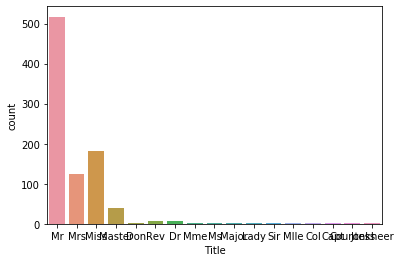

j. If some of these titles are equivalent convert them in order to bring them all in the same category.

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

4. Supprimez les colonnes 'PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp' du dataset, pourquoi n'en avons nous plus besoin par la suite ?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Sex              891 non-null    object 
 3   Age              714 non-null    float64
 4   Parch            891 non-null    int64  
 5   Fare             891 non-null    float64
 6   Embarked         891 non-null    object 
 7   Name_length      891 non-null    int64  
 8   Has_Cabin        891 non-null    int64  
 9   FamilySize       891 non-null    int64  
 10  IsAlone          891 non-null    int64  
 11  CategoricalFare  891 non-null    int64  
 12  CategoricalAge   714 non-null    float64
 13  Title            891 non-null    object 
dtypes: float64(3), int64(8), object(3)
memory usage: 97.6+ KB


5. Separate the target variable from the rest and split the data between train and test

6. Normalize the data using the pipeline tehcnique in order to apply different treatment for categorical and numerical data.

6. Fill the missing values in the train and test sets 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       668 non-null    float64
 1   1       668 non-null    float64
 2   2       668 non-null    float64
 3   3       668 non-null    float64
 4   4       668 non-null    float64
 5   5       668 non-null    float64
 6   6       668 non-null    float64
 7   7       668 non-null    float64
 8   8       668 non-null    float64
 9   9       668 non-null    float64
 10  10      668 non-null    float64
 11  11      668 non-null    float64
 12  12      668 non-null    float64
 13  13      668 non-null    float64
 14  14      668 non-null    float64
 15  15      668 non-null    float64
 16  16      668 non-null    float64
dtypes: float64(17)
memory usage: 88.8 KB


## Visualisations 

Now that our dataset is cleaned, let's proceed to some visualisations and exploratory analysis.

**Pearson Correlation Heatmap**

5. Produce a figure that contains the correlation table for all the explanatory variables of the dataset, what do you think?

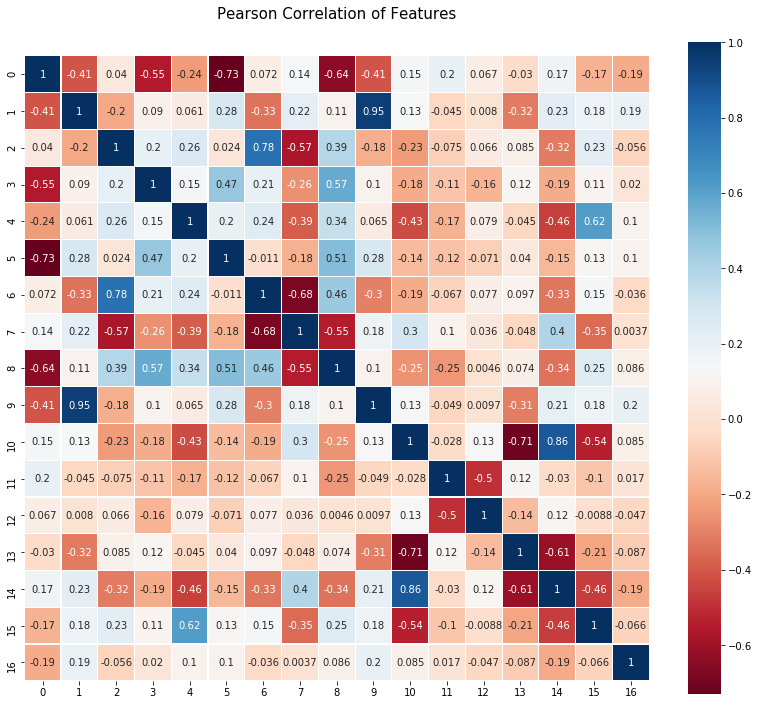

Correlations between the variables are not too high, we can hope that they will each bring complementory information in order to predict the target variable.

# Ensembling & Stacking models

Now that we have finished our preprocessing and made sure our data was fit for prediction, let's move on to creating our stacking predictor.

# Generating our Base First-Level Models 

We will now start by preparing instances of our first order models. Create instances of the following predictors :

 1. Random Forest classifier
 2. Extra Trees classifier
 3. AdaBoost classifer
 4. Gradient Boosting classifer
 5. Support Vector Machine

 7. Create an instance instance ```tree``` of DecisionTreeClassifier with max_depth = 5

8. Create an instance ```knn``` of KNeighborsClassifier

9. Create an instance ```nb``` of an GaussianNB

10. Create and instance ```logreg``` of LogisticRegression

11. Create an instance svc of an SVC with kernel = "rbf" and probability = True

12.Intanciate a stacking classifier using ```from sklearn.ensemble import StackingClassifier``` use the intances of the five first predictors for the variable estimators and the default final estimator (it's a logistic regression)

13. Use the fit_transform method of the StackingClassifer in order to create a dataset containing the predicitons of the first order models for the train set

,tree,knn,nb,logreg,svc
0,0.000000,0.0,7.712272e-01,0.198538,0.138898
1,0.324324,0.6,2.083453e-01,0.605101,0.321837
2,0.973913,1.0,2.915407e-01,0.811500,0.835827
3,0.109929,0.0,6.066584e-13,0.000953,0.131821
4,0.109929,0.0,1.463613e-04,0.067631,0.138867
...,...,...,...,...,...
663,0.000000,0.4,7.020850e-01,0.310390,0.196809
664,0.324324,0.4,1.016728e-02,0.220003,0.206229
665,0.670886,0.8,5.538838e-01,0.682926,0.831603
666,0.670886,0.4,9.999927e-01,0.774334,0.705895


14. Display the correlations between the first order predictions, is the chosen collection of models fit for stacking ?

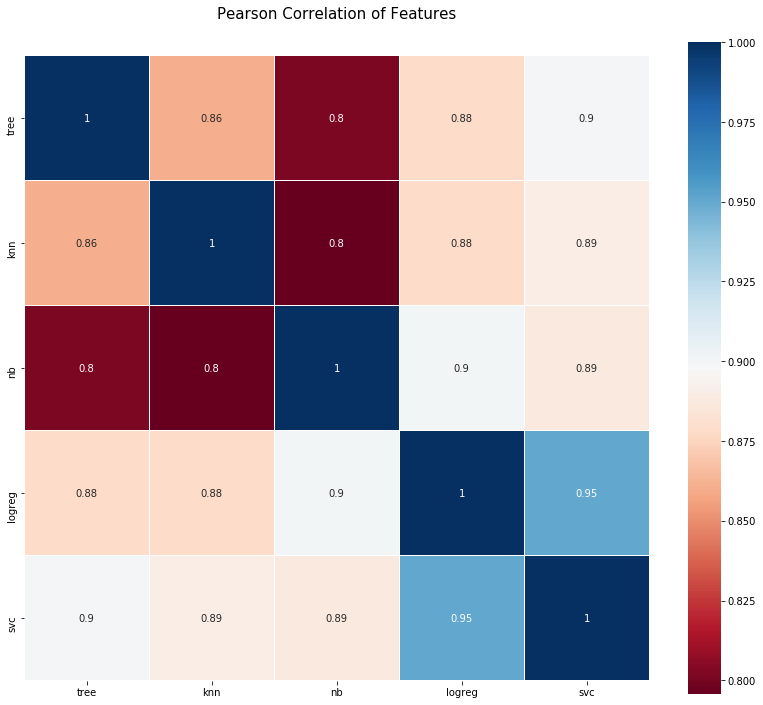

Except for the predictions produced by the svc and the logreg that are a little too correlated, it seems that the chosen collection of models produce predictions that are not too correlated, therefore they are a good candidates for stacking.

# Second-Level Predictions from the First-level Output

15. Create another instance of a stacking classifier without including svc (it's the model with the highest variance so it may lead to higher overfitting).

16. Train this instance of the Stacking Classifier model on the training data. How does it perform on the training data and test data ?

Score for the stacking classifier on the train set : 0.8667664670658682


Score for the stacking classifier on the test set : 0.8161434977578476


17. Run a sanity check to make sure our stacking was effective, train all first order models on the training set and make sure their score are inferior to thatof the stacking classifer.

the score for the knn model on the train set is : 
 0.8622754491017964 
 the score for the knn model on the test set is : 
 0.7713004484304933 

 the score for the tree model on the train set is : 
 0.8682634730538922 
 the score for the tree model on the test set is : 
 0.8026905829596412 

 the score for the naive bayes model on the train set is : 
 0.7949101796407185 
 the score for the naive bayes model on the test set is : 
 0.7847533632286996 

 the score for the logistic regression model on the train set is : 
 0.8308383233532934 
 the score for the logistic regression model on the test set is : 
 0.820627802690583 



### Conclusion
The best candidate among the first order models is logistic regression, it has the highest performance on the test set and doesn't overfit as much as some of the other first order models.
The stacking helped taking the performance on the test set by 1 point, so in this case the stacking proved to be useful.